In [1]:
import utils.s3ops as s3ops

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
bucket_name = "strava-raw"
tables = [  
    "activities.json",
    "laps.json",
    "streams.json",
    "zones.json",
]

In [3]:
activities = s3ops.load_table(bucket_name, tables[0])

In [4]:
for key, activity in activities.items():
    if activity['name'] == "Philly Marathon!":
        print(key)

8146083540


In [5]:
streams = s3ops.load_table(bucket_name, tables[2])

In [6]:
def transform(data):
    count, _ = np.histogram(np.hstack(data), bins=100)

    minimum = np.min(count)
    min_max_range = np.max(count) - minimum
    data = 255 * (count - minimum) / min_max_range
    
    return data

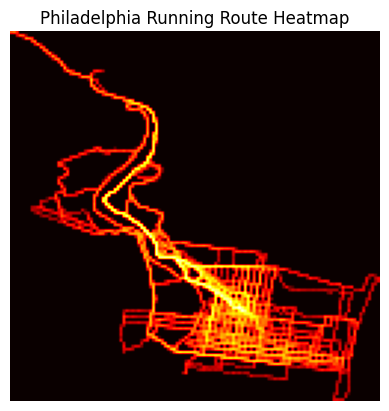

In [104]:

latlon_data = {
    "xs": [],
    "ys": []
}
for key, obj in streams.items():
    if 'latlng' in obj:
        y, x = np.transpose(obj['latlng']['data'])
        if np.mean(x) > -75.4 and np.mean(x) < -75 and np.mean(y) > 39.6:
            latlon_data['xs'].append(x)
            latlon_data['ys'].append(-1 * y)

hist, _, _ = np.histogram2d(
    np.hstack(latlon_data['ys']),
    np.hstack(latlon_data['xs']),
    bins=125)


plt.imshow(np.log(hist + 1), cmap="hot")
plt.tick_params(left=False, bottom=False)
plt.axis('off')
plt.title("Philadelphia Running Route Heatmap")
plt.show()

(array([ 66.,   0.,   0.,  74.,   0.,  62.,  96.,  97., 112., 155., 118.,
        102., 155., 109., 179., 137., 137., 122., 129., 121.,  87.,  73.,
         69.,  38.,  42.,  36.,  23.,  20.,  20.,  19.,   8.,   2.]),
 array([0.        , 0.20943626, 0.41887252, 0.62830878, 0.83774505,
        1.04718131, 1.25661757, 1.46605383, 1.67549009, 1.88492635,
        2.09436261, 2.30379888, 2.51323514, 2.7226714 , 2.93210766,
        3.14154392, 3.35098018, 3.56041644, 3.76985271, 3.97928897,
        4.18872523, 4.39816149, 4.60759775, 4.81703401, 5.02647027,
        5.23590654, 5.4453428 , 5.65477906, 5.86421532, 6.07365158,
        6.28308784, 6.4925241 , 6.70196037]),
 <BarContainer object of 32 artists>)

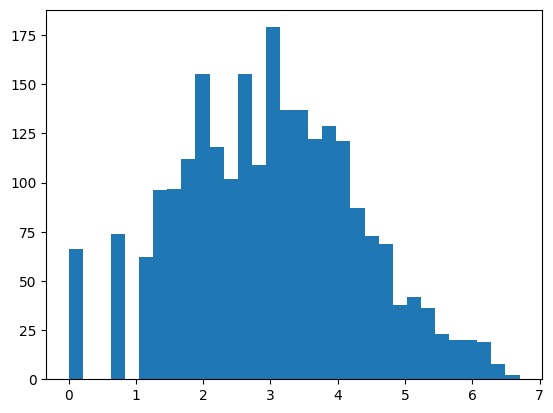

In [86]:
plt.hist(np.log(hist[hist > 0]), bins=32)